# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

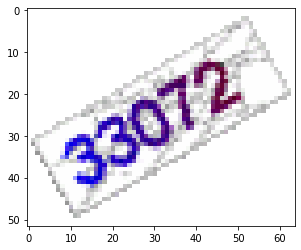

[299.65045938  40.16668781] [[ 0.49926819 -0.86644751]
 [-0.86644751 -0.49926819]]


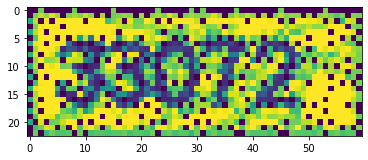

In [6]:
from hack_pca import hack_pca

# Hack different images yourself
plt.imshow(plt.imread("1.gif"))
plt.show()

img = hack_pca('1.gif')
plt.imshow(img)
plt.show()

## Apply PCA on face image

图1-最初输入的人脸：
图2-标准化后的人脸：


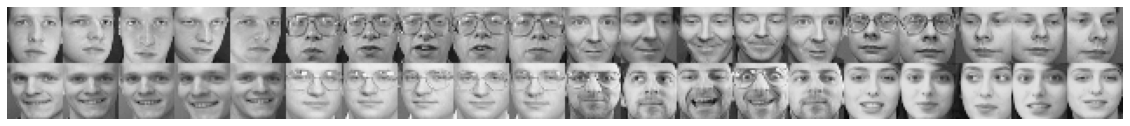

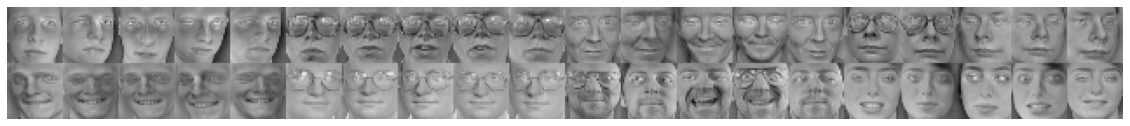

In [12]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

def normalize(x):
    avg = np.average(x, axis=0).reshape(1, x.shape[1])
    std = np.std(x, axis=0).reshape(1, x.shape[1])
    std[std == 0] = 1
    return (x - avg) / std

# 1. Feature preprocessing
# begin answer
feature_train = normalize(fea_Train)
feature_test = normalize(fea_Test)
# end answer
from show_face import show_face
print("图1-最初输入的人脸：")
show_face(fea_Train)
print("图2-标准化后的人脸：")
show_face(feature_train)

[ 2.88367717e+02  1.21114441e+02  7.84750942e+01 ... -7.44222219e-15
 -7.44222219e-15 -8.25257711e-15]


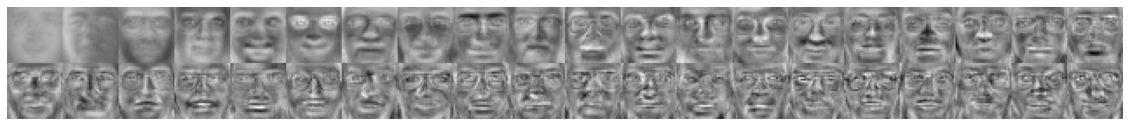

In [16]:
# 2. Run PCA
# begin answer
from pca import PCA
eigen_vector, eigen_value = PCA(feature_train.T)
eigen_vector = np.real(eigen_vector)
eigen_value = np.real(eigen_value)
# end answer
# 3. Visualize eigenface
# begin answer
from show_face import show_face
show_face(eigen_vector.T)
print(eigen_value)
# end answer

Error rate = -4.0, when k = 1
Error rate = -4.0, when k = 2
Error rate = -4.0, when k = 4
Error rate = -4.0, when k = 8
Error rate = -4.0, when k = 16
Error rate = -4.0, when k = 32
Error rate = -4.0, when k = 64
Error rate = -4.0, when k = 128


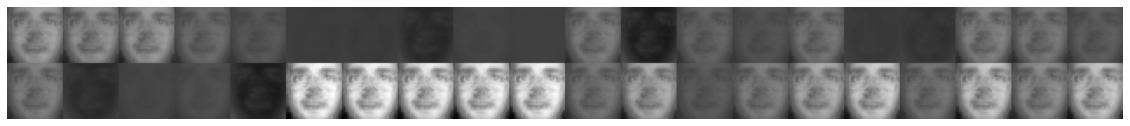

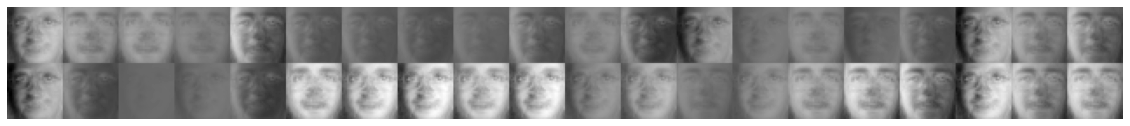

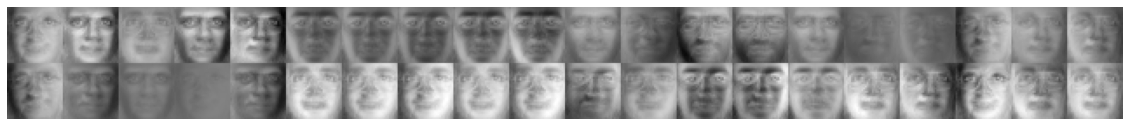

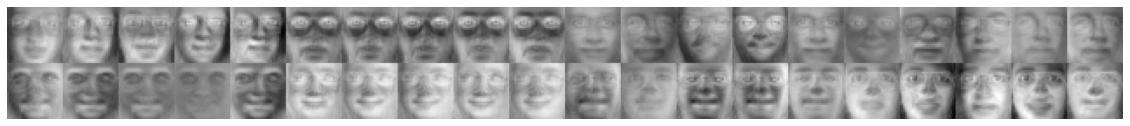

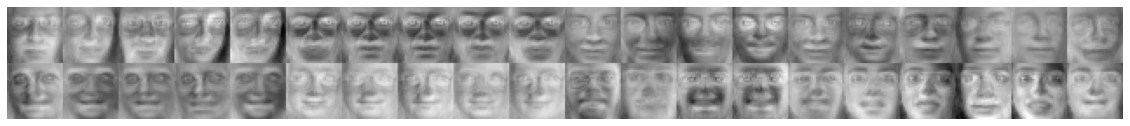

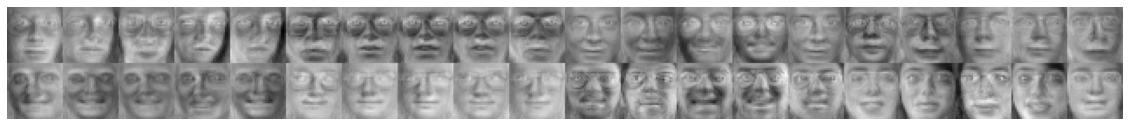

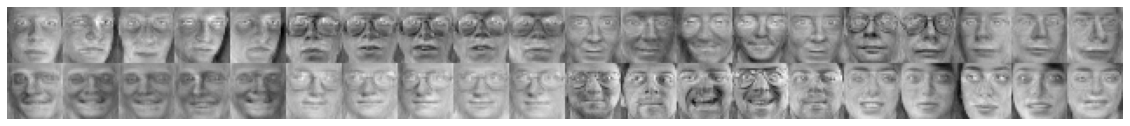

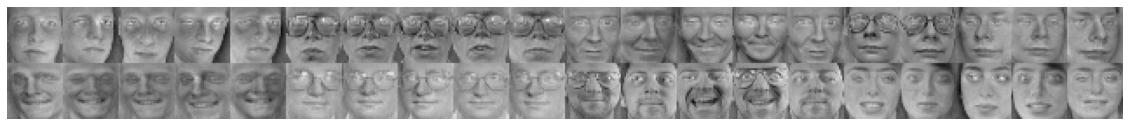

In [22]:
# 4. Project data on to low dimensional space
# begin answer
from knn import knn
ks = [1, 2, 4, 8, 16, 32, 64, 128]
for k in ks:
    project_train = np.matmul(feature_train, eigen_vector[:, :k])
    project_test = np.matmul(feature_test, eigen_vector[:, :k])
# end answer
    # 5. Run KNN in low dimensional space
    # begin answer
    res_train = knn(project_test, project_train, gnd_Train, 1)
    error_rate = 1 - np.sum(res_train == gnd_Test) / res_train.shape[0]
    print("Error rate = " + str(error_rate) + ", when k = " + str(k))
    # end answer
    # 6. Recover face images form low dimensional space, visualize them
    # begin answer
    rebuild_face = np.matmul(project_train, eigen_vector[:, :k].T)
    show_face(rebuild_face)
    # end answer  

## You are encouraged to apply LDA on this dataset!

In [ ]:
from LDA import LDA

# Your code here
# begin answer
# end answer